
# Climate Change in Bozeman, Montana

This notebook will analyze temperature data in Bozeman, MT to investigate for a warming trend due to climate change. I am using data from the NCEI - Station (PUT_STATION_HERE). I'll be using a simple linear regression to do this analysis, which is certainly a limited tool, but is a good place to start.

DISCUSSION OF LR ASSUMPTIONS HERE

If time allows, I'd also like to investigate snowfall amounts for a climate change signal. However, that will be a little bit harder, as precipitation data on a daily scale is a non-Gaussian data product.

## To-Do

- [ ] Finish documentation of Bozeman weather station once link works again
- [ ] Add discussion of LR Assumptions
- [ ] Complete Bozeman Tobs analysis
- [ ] Tackle Bozeman snowfall analysis?


In [2]:
# Import libraries (all that will be needed for this project)

import earthpy # local data management
import pandas as pd
import numpy as np
import hvplot.pandas # For making an interactive plot
import holoviews as hv
import matplotlib.pyplot as plt # advanced plotting options
import seaborn as sns # statistical plots for tabular data
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

print('Done!')

Done!


## Import the Data and Organize into a DataFrame

Add some descriptive text here
- Where from
- Station info
- etc


In [4]:
# Access Observed Temperature data from the Bozeman Weather station

bzn_tobs_url = ('https://www.ncei.noaa.gov/access/services/da'
'ta/v1?dataset=daily-summaries&dataTypes=TOBS&stations=USC00241044&'
'startDate=1892-04-08&endDate=2025-09-25&units=standard')

bzn_tobs_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TOBS&stations=USC00241044&startDate=1892-04-08&endDate=2025-09-25&units=standard'

In [ ]:
# Download the climate data
# I'm storing the Tobs data in bzn_t_df_raw
bzn_t_raw_df = pd.read_csv(
    bzn_tobs_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN']
)

# Check that the download worked
bzn_t_raw_df.tail()

,STATION,TOBS
DATE,,
2025-09-13,USC00241044,73.0
2025-09-14,USC00241044,79.0
2025-09-15,USC00241044,63.0
2025-09-16,USC00241044,62.0
2025-09-17,USC00241044,70.0


In [ ]:
# Save the climate data for later use
bzn_t_raw_df.to_csv('bozeman_tobs_1892-2025')


## Plot the data to start looking at them


<Axes: ylabel='Frequency'>

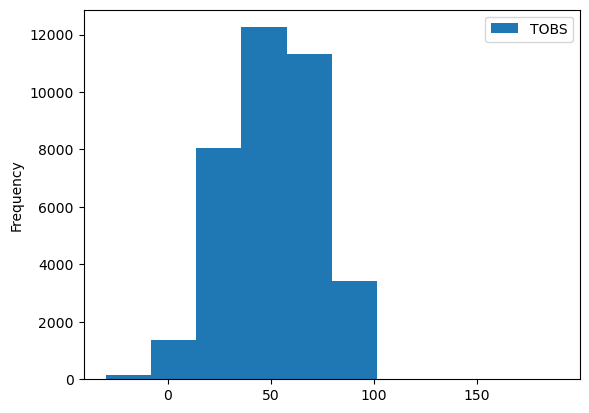

In [6]:
# Plot the data as a histogram to check that NaNs were imported correct
bzn_t_raw_df.plot.hist()

In [7]:
# Check that the data were imported to a DataFrame
type(bzn_t_raw_df)

pandas.core.frame.DataFrame

In [14]:
# Clean up the DataFrame items and labels

# This step removes Station ID name as we don't need it in the DF, it 
# renames 'TOBS' to temp_f, and adds a column converted to Celsius

bzn_t_df = bzn_t_raw_df[['TOBS']]
bzn_t_df = bzn_t_df.dropna()
bzn_t_df = bzn_t_df.rename(columns={'TOBS':'temp_f'})
bzn_t_df['temp_c'] = (bzn_t_df['temp_f'] - 32) * (5 / 9)
bzn_t_df

,temp_f,temp_c
DATE,,
1918-05-01,58.0,14.444444
1918-05-02,73.0,22.777778
1918-05-03,77.0,25.000000
1918-05-04,74.0,23.333333
1918-05-05,49.0,9.444444
...,...,...
2025-09-13,73.0,22.777778
2025-09-14,79.0,26.111111
2025-09-15,63.0,17.222222


<Axes: title={'center': 'Daily Temperature in Bozeman, MT'}, xlabel='Year', ylabel='Temperature ($^\\circ$F)'>

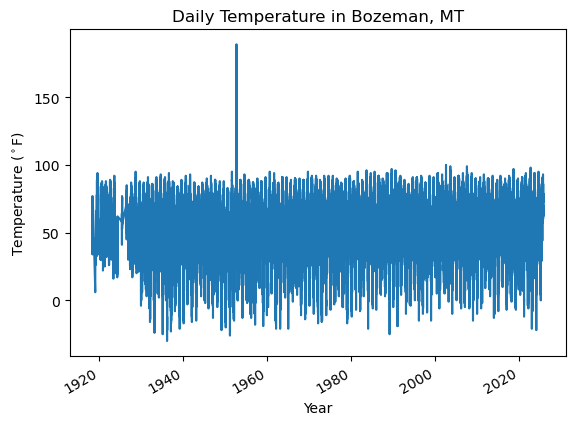

In [16]:
# Plot data as a line plot

bzn_t_df.plot(
    y= 'temp_f',
    title='Daily Temperature in Bozeman, MT',
    xlabel='Year',
    ylabel='Temperature ($^\circ$F)',
    legend=False
    )

### Interpretation

There are two interesting things in this dataset. 

First, there is what must be a wildly erroneous value of nearly 200&deg;F between 1940 and 1950. This error should be minimized by working with the annual mean.

Second, from the beginning of the timeseries to roughly 1950 there are almost no temperatures close to 0 &deg;F, which, I doubt is accurate. This will require some digging into to figure out what's going on and how to address this.


## Resample the data to an annual mean and plot interactively


In [17]:
# Resample the data

bzn_t_ann_df = bzn_t_df.resample('YE').mean()
bzn_t_ann_df

,temp_f,temp_c
DATE,,
1918-12-31,55.405405,13.003003
1919-12-31,63.559242,17.532912
1920-12-31,59.327014,15.181675
1921-12-31,61.495327,16.386293
1922-12-31,61.859155,16.588419
...,...,...
2021-12-31,53.468493,11.926941
2022-12-31,51.052055,10.584475
2023-12-31,52.608219,11.449011


<Axes: title={'center': 'Daily Temperature in Bozeman, MT'}, xlabel='Year', ylabel='Temperature ($^\\circ$ F)'>

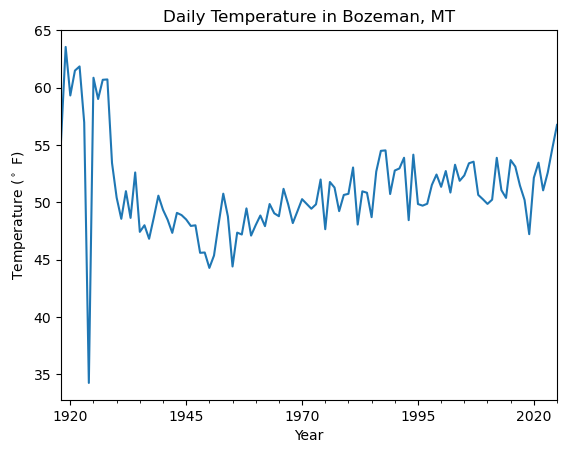

In [20]:
# Plot the data to make sure this looks better

bzn_t_ann_plot = bzn_t_ann_df.plot(
    y= 'temp_f',
    title='Daily Temperature in Bozeman, MT',
    xlabel='Year',
    ylabel='Temperature ($^\circ$ F)',
    legend=False
)

bzn_t_ann_plot

### Interpretation

The erroneous high value has been smoothed out, as I suspected. However, there's something strange going on before 1930, as I noted before.

In [21]:
# Make an interactive plot

bzn_t_ann_plot_int = bzn_t_ann_df.hvplot(
    y= 'temp_f',
    title='Daily Temperature in Bozeman, MT',
    xlabel='Year',
    ylabel='Temperature ($^\circ$ F)',
    legend=False   
)

bzn_t_ann_plot_int

:Curve   [DATE]   (temp_f)

In [ ]:
# Save plots

# bzn_t_ann_plot.savefig('bzn_t_ann_plot.png')
hv.save(bzn_t_ann_plot_int, 'bzn_t_ann_plot_int.html')

AttributeError: 'Axes' object has no attribute 'savefig'


## Fit a linear regression to the data



## Plot the linear regression



## Wrap up the notebook and get ready to make a portfolio post
